In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint
from pathlib import Path
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from treeinterpreter import treeinterpreter
from utils import draw_tree, waterfallplot

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import scale 

pd.set_option('display.max_columns', None)
%matplotlib inline

In [2]:
# listando archivos en directorio
# 'aps_failure_test_set.csv', 
# 'aps_failure_test_set_processed_8bit.csv', 
# 'aps_failure_training_set.csv', 
# 'aps_failure_training_set_processed_8bit.csv'

In [3]:
df_train = pd.read_csv('aps_failure_training_set.csv',na_values='na')
df_test = pd.read_csv('aps_failure_test_set.csv', na_values='na')

In [4]:
y_train = df_train['class']
y_train = y_train.replace('neg', 0)
y_train = y_train.replace('pos',1)
x_train = df_train.drop('class', axis=1)
x_train = x_train.fillna(x_train.mean())

In [5]:
y_test = df_test['class']
y_test = y_test.replace('neg', 0)
y_test = y_test.replace('pos',1)
x_test = df_test.drop('class', axis=1)
x_test = x_test.fillna(x_test.mean())

In [6]:
def score():print(m.oob_score_, m.score(x_test, y_test))

In [21]:
# Nota: hay que optimizar el n° de aboleas adecuado: n_estimators de forma automática.
m = RandomForestRegressor(n_estimators=20,  n_jobs=-1)
m.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [22]:
pronostico = m.predict(x_test)

In [23]:
#Costo de Pronostico
U_check = 10 #cost that an unnecessary check
M_check = 500 # cost of missing a faulty truck

umbral = 0.00

FP = ((pronostico > umbral) & (y_test == 0.0)).sum()
FN = ((pronostico <= umbral) & (y_test == 1.0)).sum()

Total_Cost = FP*U_check + FN*M_check
print('Total Cost: ', Total_Cost, Cost_1,  Cost_2)

# La función de costo debería ser tambien optimizada para variaciones de probabilidades de los Falsos Negativos

Total Cost:  11660 800 8


In [24]:
result = np.array([tree.predict(x_test) for tree in m.estimators_])

In [25]:
np.mean(result,axis=0), np.std(result, axis=0)

(array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]))

In [26]:
[m.estimators_[i].score(x_test, y_test) for i in range(10)]

[0.46205866666666656,
 0.33644799999999997,
 0.361024,
 0.47025066666666676,
 0.3746773333333333,
 0.45386666666666664,
 0.45386666666666664,
 0.401984,
 0.41563733333333336,
 0.475712]

In [27]:
m.score(x_train, y_train)

0.9501466101694915

In [28]:
m.score(x_test, y_test)

0.7172736

In [29]:
feat_importance = pd.DataFrame({'cols':x_train.columns, 'imp':m.feature_importances_}).sort_values('imp', ascending=False)
feat_importance.head(10)

,cols,imp
70,bj_000,0.296556
7,ag_001,0.064268
8,ag_002,0.063327
37,ay_005,0.055468
40,ay_008,0.024624
21,am_0,0.023800
38,ay_006,0.019281
20,al_000,0.010446
143,do_000,0.009281
163,ee_005,0.009194


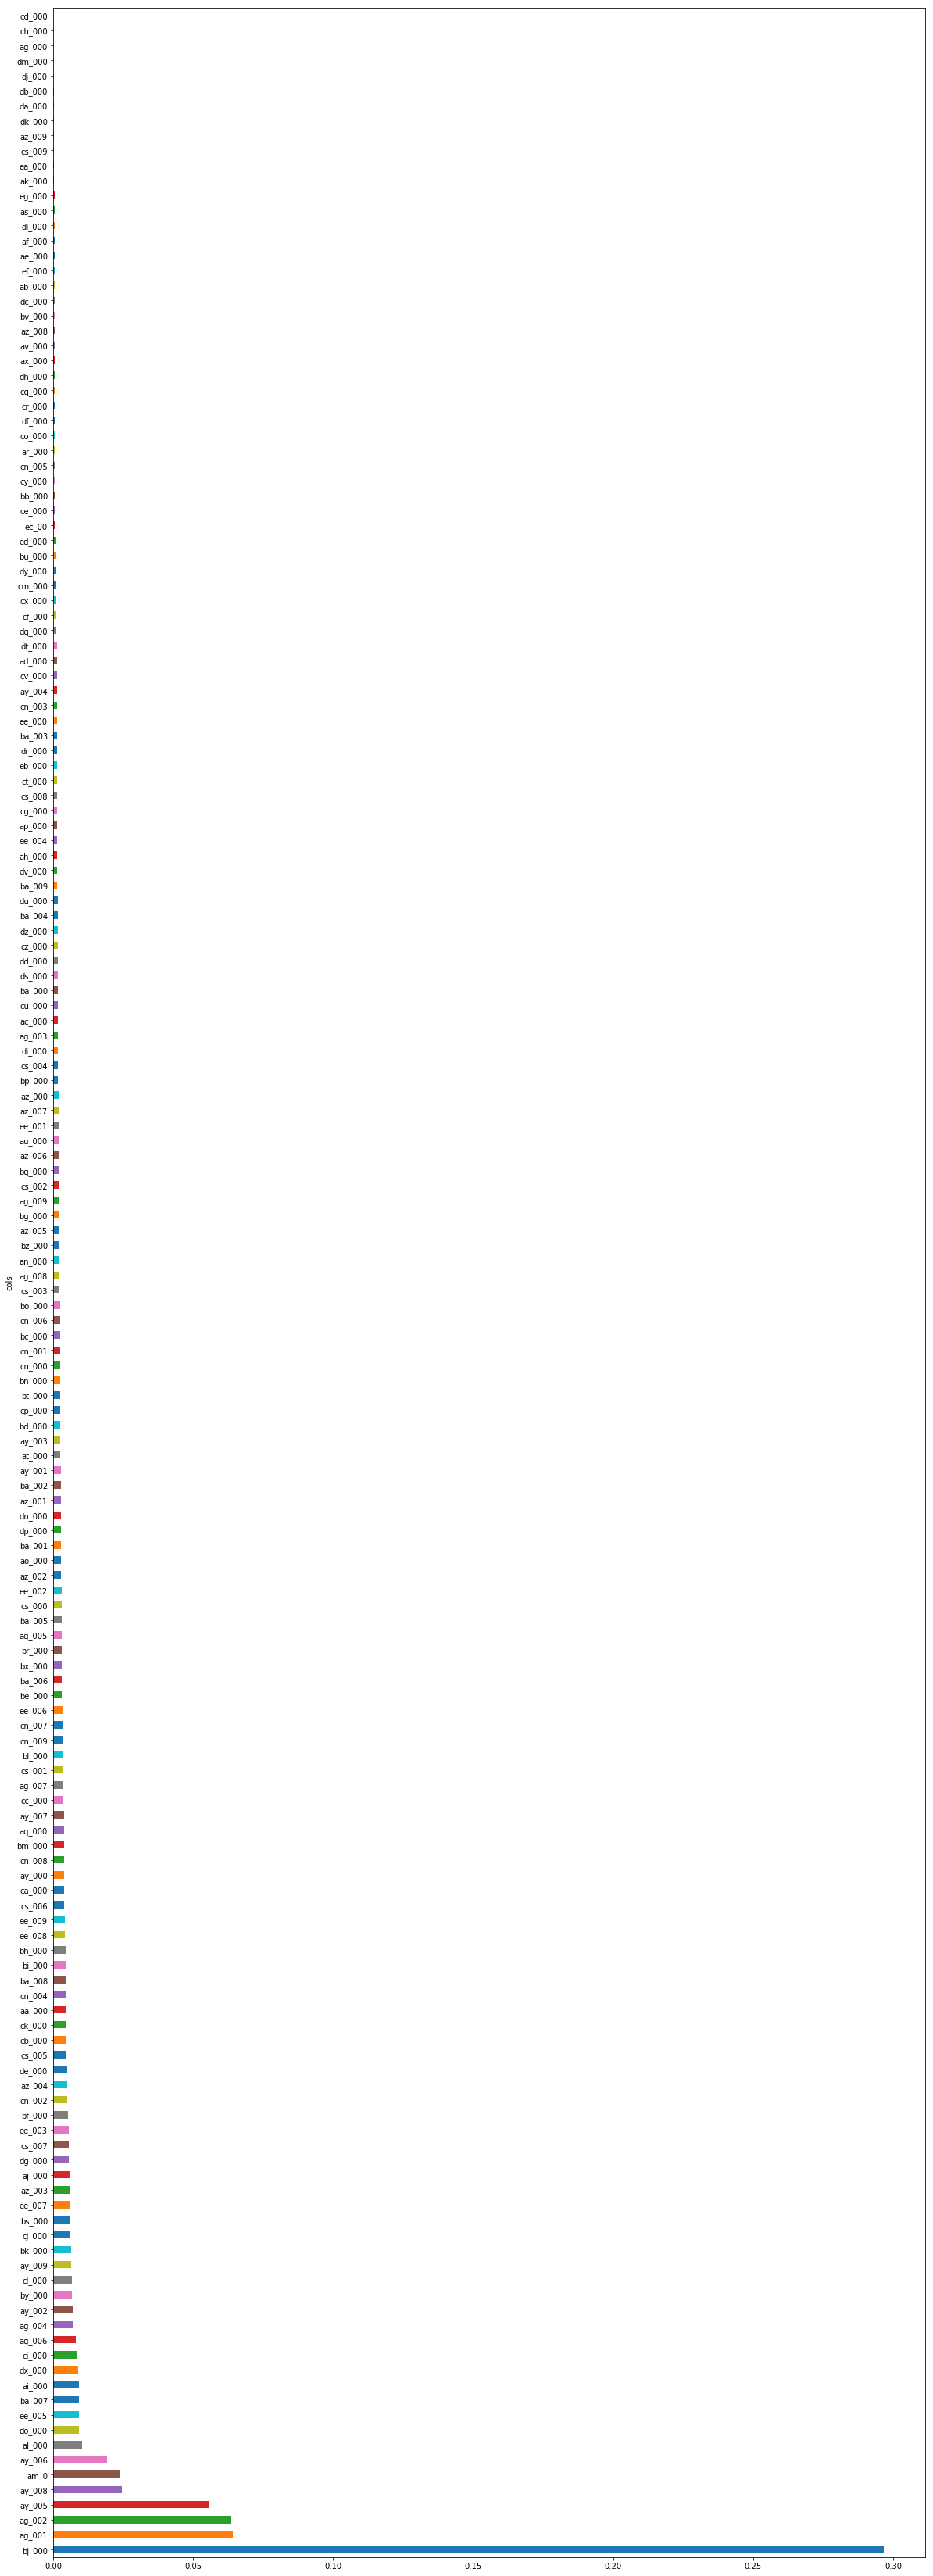

In [30]:
#Deberiamos reducir la dimensionalidad tanto por menor importancia como por estudio de correlación entre variables
feat_importance.plot('cols', 'imp', 'barh', figsize=(20,60), legend=False);

In [31]:
sample = x_train.sample()
sample

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,ag_009,ah_000,ai_000,aj_000,ak_000,al_000,am_0,an_000,ao_000,ap_000,aq_000,ar_000,as_000,at_000,au_000,av_000,ax_000,ay_000,ay_001,ay_002,ay_003,ay_004,ay_005,ay_006,ay_007,ay_008,ay_009,az_000,az_001,az_002,az_003,az_004,az_005,az_006,az_007,az_008,az_009,ba_000,ba_001,ba_002,ba_003,ba_004,ba_005,ba_006,ba_007,ba_008,ba_009,bb_000,bc_000,bd_000,be_000,bf_000,bg_000,bh_000,bi_000,bj_000,bk_000,bl_000,bm_000,bn_000,bo_000,bp_000,bq_000,br_000,bs_000,bt_000,bu_000,bv_000,bx_000,by_000,bz_000,ca_000,cb_000,cc_000,cd_000,ce_000,cf_000,cg_000,ch_000,ci_000,cj_000,ck_000,cl_000,cm_000,cn_000,cn_001,cn_002,cn_003,cn_004,cn_005,cn_006,cn_007,cn_008,cn_009,co_000,cp_000,cq_000,cr_000,cs_000,cs_001,cs_002,cs_003,cs_004,cs_005,cs_006,cs_007,cs_008,cs_009,ct_000,cu_000,cv_000,cx_000,cy_000,cz_000,da_000,db_000,dc_000,dd_000,de_000,df_000,dg_000,dh_000,di_000,dj_000,dk_000,dl_000,dm_000,dn_000,do_000,dp_000,dq_000,dr_000,ds_000,dt_000,du_000,dv_000,dx_000,dy_000,dz_000,ea_000,eb_000,ec_00,ed_000,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
20593,33770,0.713189,260.0,214.0,0.0,0.0,0.0,0.0,0.0,0.0,852.0,455344.0,1471066.0,300004.0,35664.0,1582.0,1204590.0,0.0,0.0,0.0,0.0,0.0,1789752.0,1346612.0,660952.0,377790.0,0.0,0.0,0.0,0.0,1550.0,354.0,0.0,0.0,0.0,0.0,0.0,206778.0,1498854.0,420502.0,138378.0,0.0,2910.0,850.0,2394.0,449862.0,1572362.0,236118.0,16.0,0.0,0.0,0.0,853136.0,379622.0,159188.0,117998.0,98078.0,87744.0,133112.0,435310.0,324.0,0.0,2451250.0,78.0,380.0,152.0,10.0,1204590.0,51480.0,345964.0,312006.0,319900.0,328840.0,399603.167571,463710.833594,513147.820297,551389.799347,582871.32293,604886.613264,6580.0,33770.77,2451250.0,2451250.0,2436802.0,18119.0,119218.0,119330.0,26060.0,2264512.0,1209600.0,75134.0,0.0,108.0,0.0,1957815.36,0.0,303827.52,0.0,0.0,0.0,0.0,0.0,27870.0,630150.0,1274850.0,310532.0,16840.0,4038.0,232.0,60.0,66.0,2451250.0,37.06298,4854.0,450.0,41102.0,158190.0,99434.0,1404970.0,541290.0,14124.0,98.0,0.0,406.0,1134.0,1472358.0,21952.0,16.0,13490.0,0.0,0.0,1979540.0,1640.0,130.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35398.0,35538.0,7302.0,0.0,0.0,84592.0,16902.0,772300.0,512636.0,0.0,0.0,0.0,0.0,3950510.0,1243.38,1134.0,320288.0,400642.0,313618.0,149948.0,329120.0,309012.0,272998.0,159076.0,9810.0,0.0,0.0,0.0


In [32]:
prediction, bias, contributions = treeinterpreter.predict(m, sample)
prediction[0], bias[0], y_train[sample.index[0]]

(0.0, 0.016605833333333334, 0)

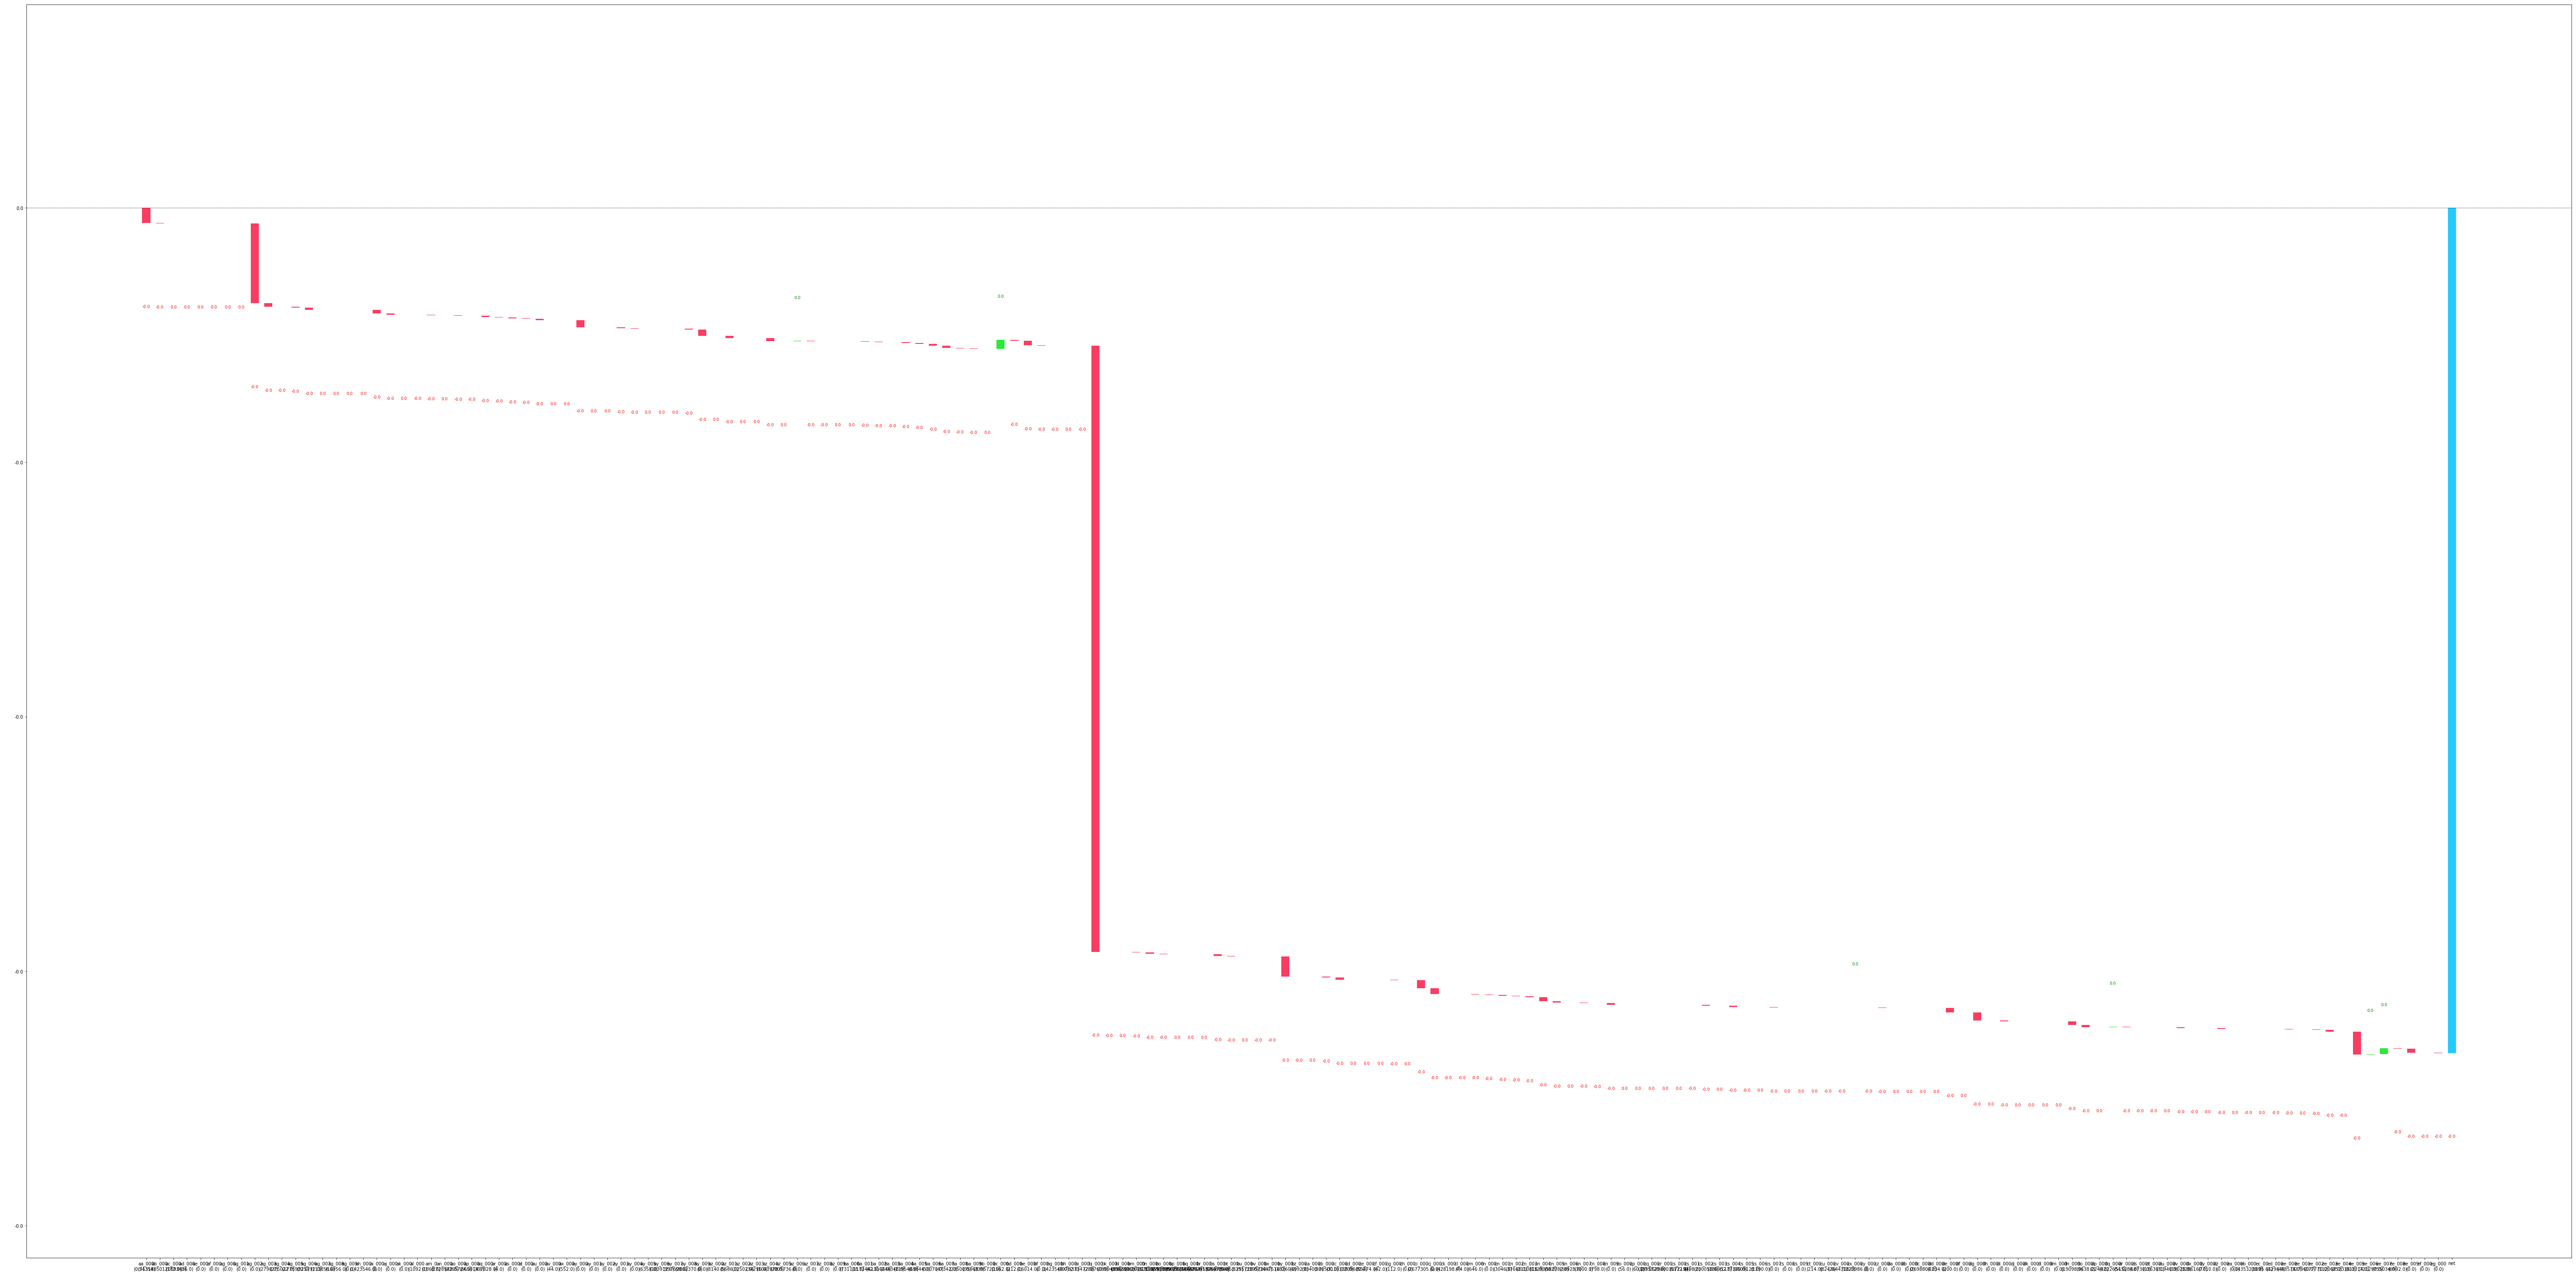

In [28]:
waterfallplot(sample, contributions[0], size=(80,40));